In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 7)

import numpy as np
import matplotlib.pyplot as plt
import random

# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 14,
    'legend.fontsize': 13,
})

Populating the interactive namespace from numpy and matplotlib


Exact simulation:

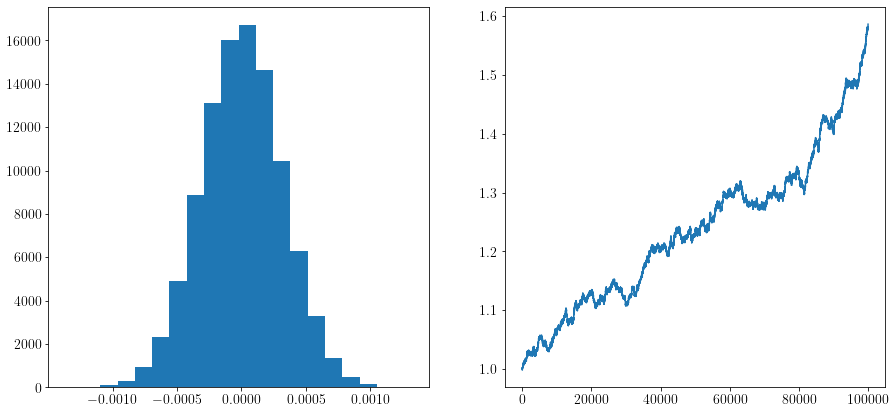

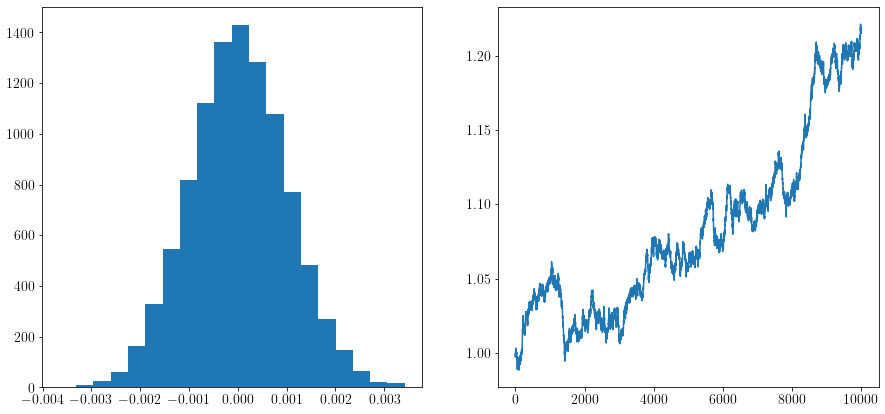

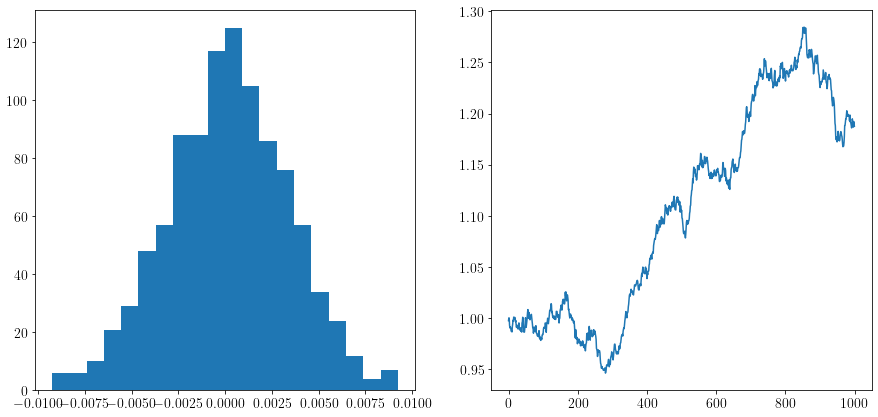

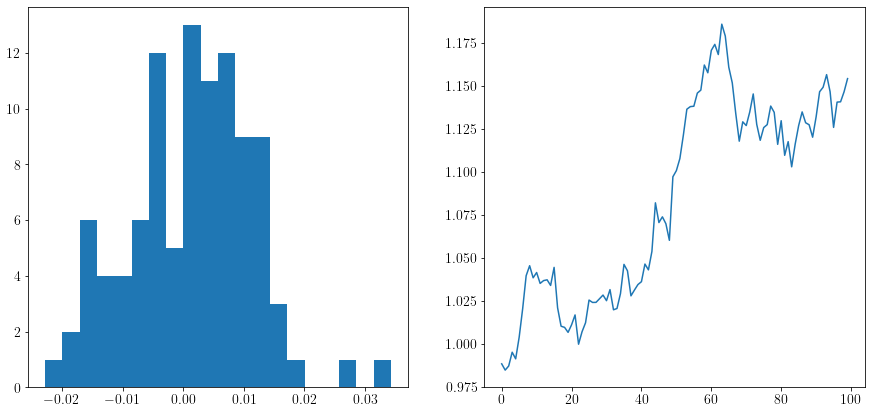

In [2]:
H = [0.00001, 0.0001, 0.001, 0.01]
T = 1
mu = 0.3
sigma = 0.1

np.random.seed(1)

for h in H:
    sim = [(mu - (sigma**2)/2)*h + sigma*np.random.normal(0, np.sqrt(h)) for i in range(int(T/h))]
    plt.subplot(1, 2, 1)
    plt.hist(sim, bins=20)
    plt.subplot(1, 2, 2)
    ys = np.exp(np.cumsum(sim))
    plt.plot(ys)
#     plt.plot(np.exp(np.cumsum([(mu)*h for i in range(int(T/h))])), 'ro', markevery=.1)
#   print(np.mean(sim), np.std(sim), np.std(sim)**.5)
#     print(ys[-1])
    plt.show()  
     

Euler-Maruyama:

0.9507604559191983


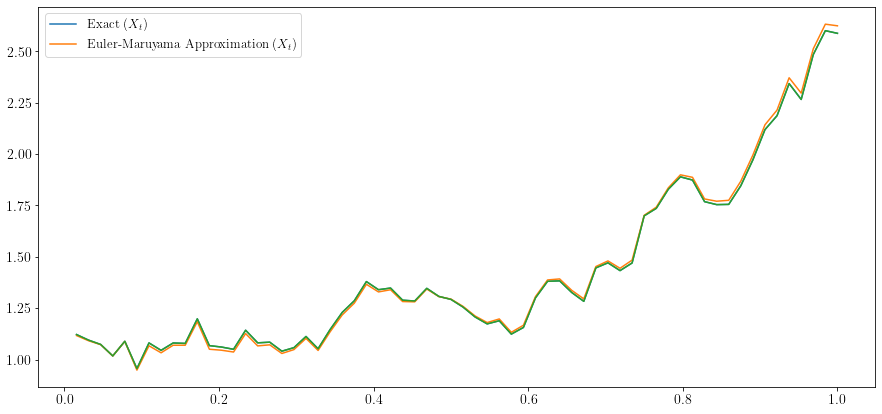

In [3]:
mu, sigma, X0 = 1,0.5,1
T = 1
N = 2**6
dt = T/N

t = np.arange(dt, T+dt, dt)
np.random.seed(1)

Z = np.random.randn(N)
dB = np.sqrt(dt) * Z
B = np.cumsum(dB)

X_theory = X0 * np.exp((mu-(sigma**2)/2)*t + (sigma*B))

X_theory_mine = np.exp(np.cumsum([(mu - (sigma**2)/2)*dt + sigma*np.sqrt(dt)*Z[i] for i in range(int(N))]))

X_simulation, X = [], X0
for j in range(N):
    X += mu*X*dt + sigma*X*dB[j]
    X_simulation.append(X)
    
plt.plot(t, X_theory, label='Exact ($X_t$)')
plt.plot(t, X_simulation, label='Euler-Maruyama Approximation ($X_t$)')
plt.plot(t, X_theory_mine)
print(np.log(X_theory[-1]))
plt.legend()
plt.show()

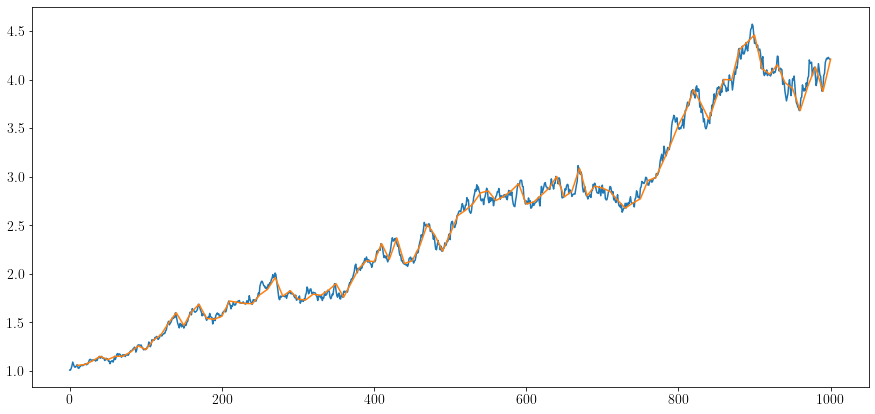

In [4]:
h = 0.001
Z = np.random.normal(0, 1, 1000)

sim = [(mu - (sigma**2)/2)*h + sigma*np.sqrt(h)*Z[i] for i in range(1000)]
plt.plot(np.exp(np.cumsum(sim)))

h = 0.01
Z = Z.reshape(-1,10).sum(axis=-1)


sim = [(mu - (sigma**2)/2)*h + (sigma*np.sqrt(h)*Z[i])/np.sqrt(10) for i in range(100)]
plt.plot(range(10,1010,10), np.exp(np.cumsum(sim)))


plt.show()

In [5]:
def sample_from_rate(rate):
    return random.expovariate(rate)

def simulate_cmc(Q, time, warm_up):
    Q = list(Q)  # In case a matrix is input
    state_space = range(len(Q))  # Index the state space
    time_spent = {s:0 for s in state_space}  # Set up a dictionary to keep track of time
    clock = 0  # Keep track of the clock
    current_state = 0  # First state
    traj = [(current_state, 0)] # trajectory
    while clock < time:
        # Sample the transitions
        sojourn_times = [sample_from_rate(rate) for rate in Q[current_state][:current_state]]
        sojourn_times += [10000000000]  # An infinite sojourn to the same state
        sojourn_times += [sample_from_rate(rate) for rate in Q[current_state][current_state + 1:]]

        # Identify the next state
        next_state = min(state_space, key=lambda x: sojourn_times[x])
        sojourn = sojourn_times[next_state]
        
        clock += sojourn
        traj.append((next_state, clock))
        
        if clock > warm_up:  # Keep track if past warm up time
            time_spent[current_state] += sojourn
        current_state = next_state  # Transition
        
    traj[-1] = (traj[-2][0], time) # Truncate final time

    pi = [time_spent[state] / sum(list(time_spent.values())) for state in state_space]  # Calculate probabilities
    return pi, traj

# Q = np.array([[-0.547, 0.547],
#               [1.92, -1.92]]
#             )/10

Q = np.array([[-6, 3, 3],
              [4, -12, 8],
              [15, 3, -18]])/300

p, traj = simulate_cmc(Q, 1000, 0)
# print(p)
print(traj)

x_val = [x[1] for x in traj]
y_val = [x[0] for x in traj]

# ax.xlabel('Time')
# ax.ylabel('State')

[(0, 0), (1, 19.89418109572096), (2, 47.58309335500728), (0, 48.5452502355322), (2, 101.45031211518074), (0, 102.377273922412), (1, 217.22424416570982), (2, 244.7552700003231), (0, 248.39697768665803), (1, 255.61392024607233), (2, 282.4934270965345), (1, 288.4328095918999), (0, 291.07054695349916), (1, 389.2422615589355), (2, 431.53377453782446), (0, 441.66678228875384), (1, 464.0110752411899), (2, 469.2940490445832), (0, 482.30228111651155), (1, 527.4066105781695), (2, 539.4883458765303), (1, 571.5130849147176), (0, 618.1482266667987), (1, 629.7606696976111), (2, 630.5372486120555), (0, 654.6852606650604), (1, 727.0321798373034), (0, 731.2290880159209), (2, 766.1803313759722), (1, 786.2998772990493), (0, 803.495985929718), (1, 818.1886375975744), (2, 849.4206213042775), (0, 854.085385501588), (1, 883.6066837733183), (0, 886.5450664472116), (0, 1000)]


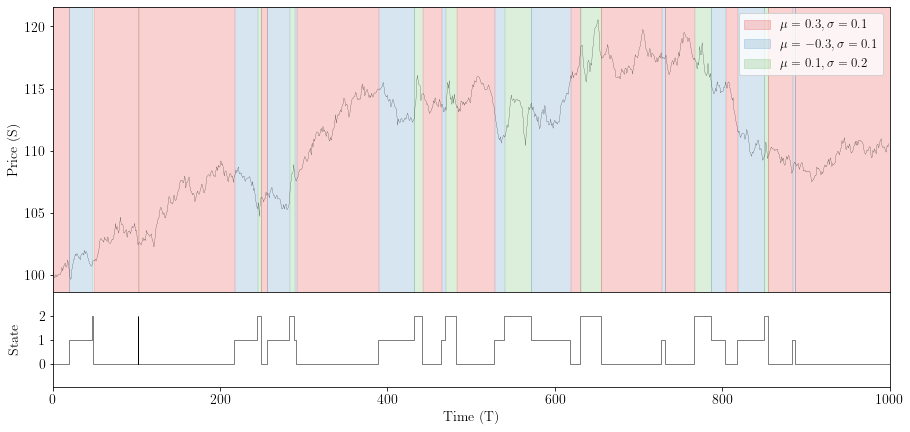

In [6]:
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'font.size': 14,
    'legend.fontsize': 13,
    'pgf.rcfonts': False
})


import matplotlib.patches as mpatches

np.random.seed(10)

states = []

for i in range(len(traj)-1):
    add = [traj[i][0]]*(math.ceil(traj[i+1][1])-math.ceil(traj[i][1]))
    states += add

    
# print(states)

switch_times = np.ceil(x_val)
# print(switch_times)

mus = [0.3, -0.3, 0.1]
sigmas = [0.1, 0.1, 0.2]
# mus = [0.1, 0.1]
# sigmas = [0.0776, 0.255]

H = [0.001]
T = 1

for h in H:


    fig, (ax, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 1]})
    plt.subplots_adjust(wspace=0, hspace=0)

    ax2.plot(x_val, y_val, drawstyle='steps-post', color='black', lw=0.5)
    ax2.set_yticks(list(range(len(Q))))
    ax2.margins(x=0, y=0.5)
    ax2.set_xlabel(r'Time (T)')
    ax2.set_ylabel(r'State')

    sim = [(mus[states[i]] - (sigmas[states[i]]**2)/2)*h + sigmas[states[i]]*np.sqrt(h)*np.random.normal(0, 1) for i in range(int(T/h))]
    sim[0] = 0
    
#     print(np.mean(sim), np.std(sim)**.5)
#     print(np.mean(sim), np.std(sim)**2)
    
    pal = plt.cm.Set1.colors
    
#     ax1.hist(sim, bins=20)

    ys = 100*np.exp(np.cumsum(sim))
    ax.plot( ys, color='black', lw=0.2)
#     ax2.vlines(switch_times, min(ys), max(ys))

    ax.margins(x=0)
    
    for i, (c, x) in enumerate(traj[:-1]):
        x = np.ceil(x)
        ax.axvspan(x, traj[i + 1][1], alpha=0.2, color=pal[c])
        
    ax.legend(handles=[mpatches.Patch(color=pal[i], label=r"$\mu={}, \sigma={}$".format(mus[i], sigmas[i]), alpha=0.2) for i in [0,1,2]])
    ax.set_xticks([])
        
    ax.set_ylabel(r'Price (S)')
    
fig.align_labels()
# fig.savefig("ctmc.pgf", bbox_inches='tight')
